In [1]:
import pandas as pd 
import requests 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker 
from mpl_finance import candlestick2_ohlc 
from matplotlib import font_manager, rc
import FindTable as ft
import FinanceExtract as fe

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
codeTable ='JongMokCodeTable_20140616_Uodate02.xlsx'
xlsx = pd.read_excel(codeTable, index_col = '종목명')

In [3]:
finance_finder = fe.FinanceExtract()

In [4]:
def show_graph(table):

    stock_table = table
    fig, ax = plt.subplots() 

    xdate = stock_table.날짜.astype('str')
    xdate[::-1].reset_index()['날짜']

    ax.plot(xdate, stock_table['종가'], label="종가",linewidth=0.7,color='k')
    ax.plot(xdate, stock_table['종가'].rolling(window=5).mean(), label="평균5일",linewidth=0.7)
    ax.plot(xdate, stock_table['종가'].rolling(window=20).mean(), label="평균20일",linewidth=0.7)
    ax.plot(xdate, stock_table['종가'].rolling(window=60).mean(), label="평균60일",linewidth=0.7)

    fig.suptitle("개미들의 주식전쟁",fontsize=30)
    ax.set_xlabel("날짜")
    ax.set_ylabel("주가(원)")
    ax.xaxis.set_major_locator(ticker.MaxNLocator(25))
    fig.set_size_inches(18.5, 10.5)

    ax.legend(loc=1)
    plt.xticks(rotation = 45)

    plt.grid()
    plt.show()

In [5]:
def stick_graph(table):
    finance_table = table

    fig, ax = plt.subplots() 

    xdate = stock_table.날짜.astype('str')
    xdate[::-1].reset_index()['날짜']
    
    ax.plot(xdate, stock_table['종가'], label="종가",linewidth=0.7,color='k')
    ax.plot(xdate, stock_table['종가'].rolling(window=5).mean(), label="평균5일",linewidth=0.7)
    candlestick2_ohlc(ax, stock_table['시가'], stock_table['고가'],stock_table['저가'],stock_table['종가'], width=1.3, colorup='r', colordown='b')


    fig.suptitle("개미들의 주식전쟁",fontsize=30)
    ax.set_xlabel("날짜")
    ax.set_ylabel("주가(원)")
    ax.xaxis.set_major_locator(ticker.MaxNLocator(25))
    fig.set_size_inches(18.5, 10.5)

    ax.legend(loc=1)
    plt.xticks(rotation = 45)

    plt.grid()
    plt.show()

끝내려면 exit
종목명 : 
현대차


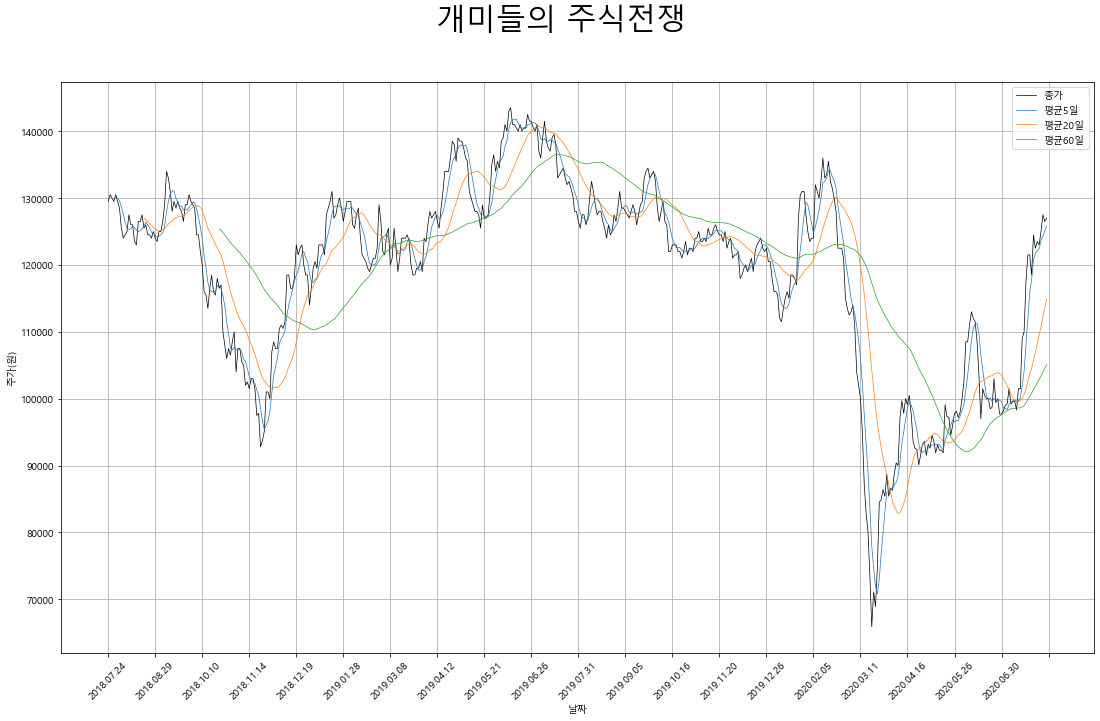

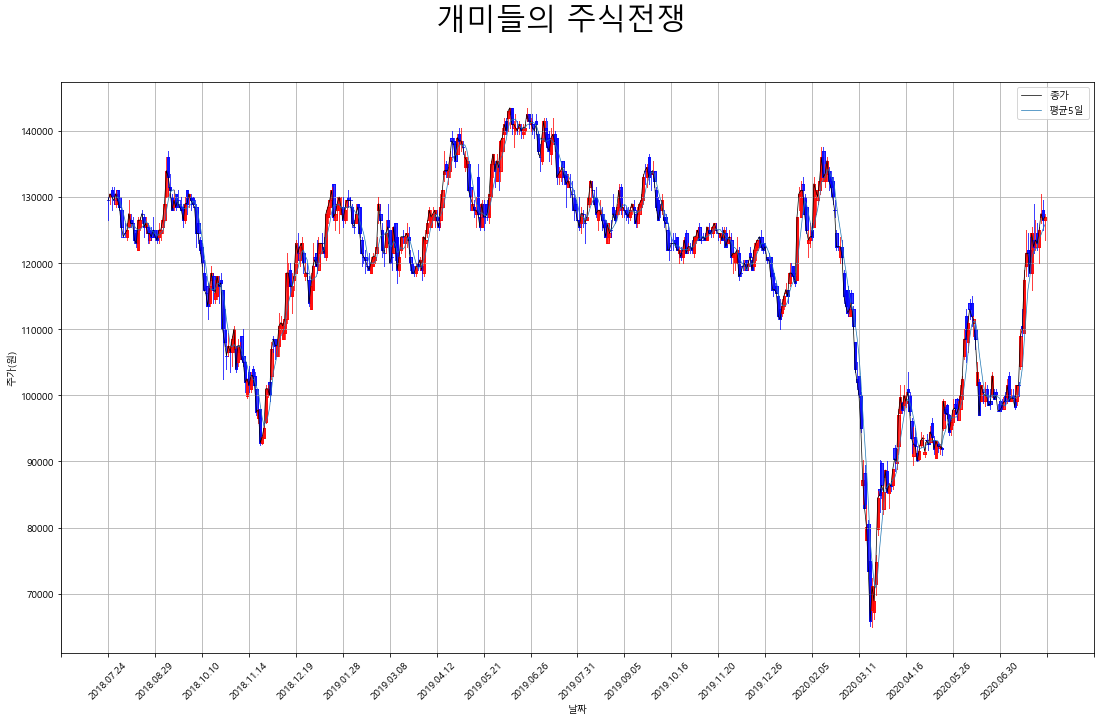

   주요재무정보        연간연간컨센서스보기                                      \
   주요재무정보 2017/12  (IFRS연결) 2018/12  (IFRS연결) 2019/12  (IFRS연결)   
0     매출액         963761.00          968126.0        1057464.00   
1    영업이익          45747.00           24222.0          36055.00   
4   당기순이익          45464.00           16450.0          31856.00   
7    자산총계        1781995.00         1806558.0        1945122.00   
8    부채총계        1034421.00         1067597.0        1181465.00   
9    자본총계         747574.00          738960.0         763658.00   
19  영업이익률              4.75               2.5              3.41   
20   순이익률              4.72               1.7              3.01   

                               분기분기컨센서스보기                                      
   2020/12(E)  (IFRS연결) 2019/09  (IFRS연결) 2019/12  (IFRS연결) 2020/03  (IFRS연결)  
0            1025353.00         269689.00         278241.00         253194.00  
1              36428.00           3785.00          11644.00           8638.00  
4        

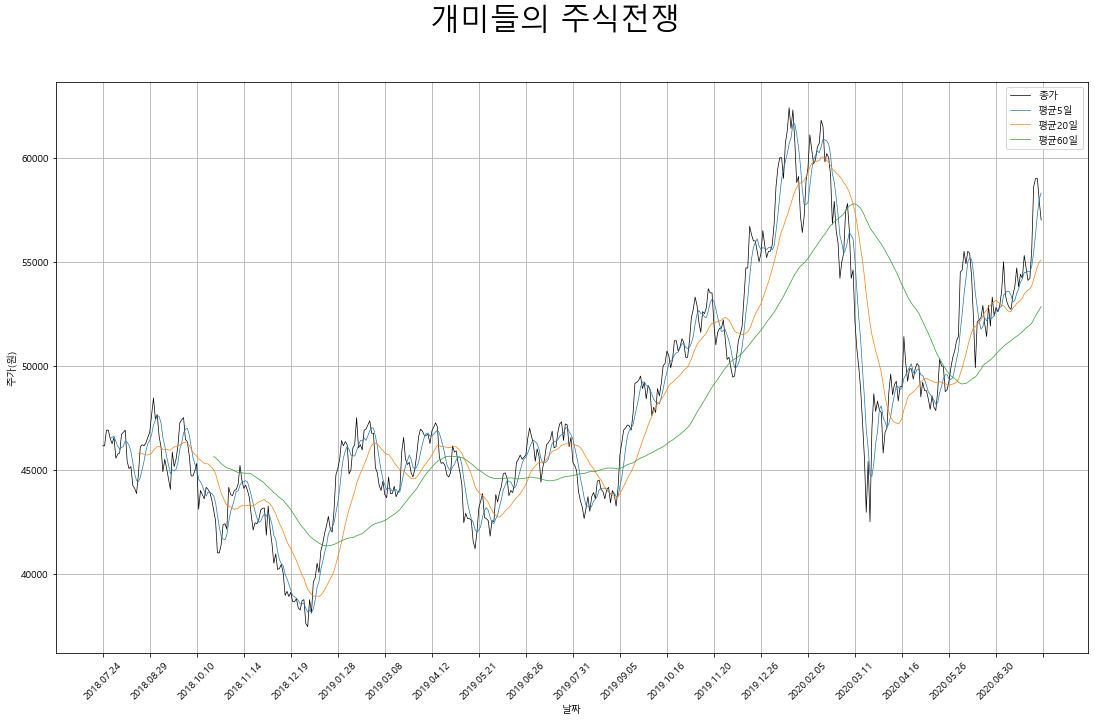

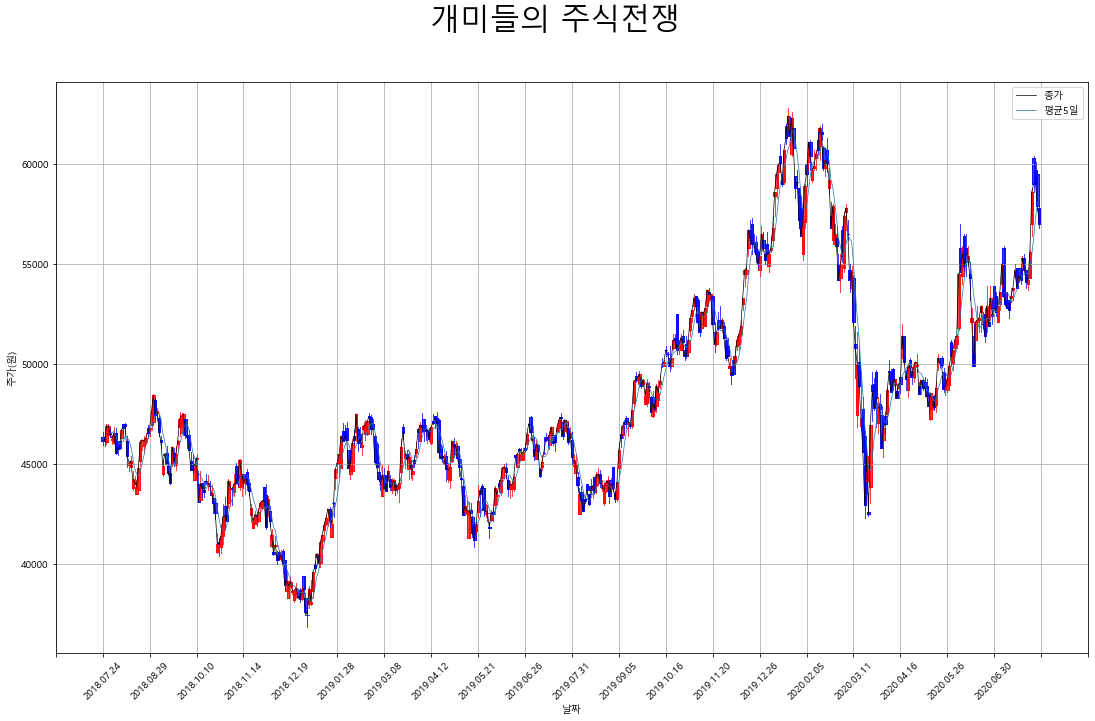

   주요재무정보        연간연간컨센서스보기                                      \
   주요재무정보 2017/12  (IFRS연결) 2018/12  (IFRS연결) 2019/12  (IFRS연결)   
0     매출액        2395754.00        2437714.00        2304009.00   
1    영업이익         536450.00         588867.00         277685.00   
4   당기순이익         421867.00         443449.00         217389.00   
7    자산총계        3017521.00        3393572.00        3525645.00   
8    부채총계         872607.00         916041.00         896841.00   
9    자본총계        2144914.00        2477532.00        2628804.00   
19  영업이익률             22.39             24.16             12.05   
20   순이익률             17.61             18.19              9.44   

                               분기분기컨센서스보기                                      
   2020/12(E)  (IFRS연결) 2019/09  (IFRS연결) 2019/12  (IFRS연결) 2020/03  (IFRS연결)  
0            2331373.00         620035.00         598848.00         553252.00  
1             325373.00          77779.00          71603.00          64473.00  
4        

In [6]:
user_input ='0'

while True :
    print('끝내려면 exit')
    print('종목명 : ')
    user_input = input()
    if(user_input =='exit'):
        break;
    try:
        product_code = xlsx[['종목코드']].loc[user_input]
        remake_code = product_code['종목코드'].head(1).iloc[0].replace("'","")
    except:
        print('없는 종목명입니다.')
        continue
    
    stock_table = ft.Ant.findTable(remake_code)
    stock_table =stock_table[::-1]

    show_graph(stock_table)
    stick_graph(stock_table)
    finance_finder.show_finance_table(remake_code)
        